# Employee Salary Prediction Project
This notebook contains the end-to-end process of building a machine learning model to predict whether a person's income is >50K or <=50K based on demographic features.

# Loading and gathering data info

In [365]:
import pandas as pd     #used for data handling

data = pd.read_csv("data/adult.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [366]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [367]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [368]:
data.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [370]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [371]:
data.shape

(48842, 15)

In [372]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Finding and handling missing values

In [373]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [374]:
data['workclass'].replace('?', 'Other', inplace=True) #replaces the data without creating a copy
data['workclass'].value_counts()

C:\Users\welcome\AppData\Local\Temp\ipykernel_20384\885852856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace('?', 'Other', inplace=True) #replaces the data without creating a copy


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [375]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [376]:
data['occupation'].replace('?', 'other', inplace=True)
data['occupation'].value_counts()

C:\Users\welcome\AppData\Local\Temp\ipykernel_20384\3174721589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace('?', 'other', inplace=True)


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
other                2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [377]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [378]:
data['native-country'].replace('?', 'other', inplace=True)
data['native-country'].value_counts()

C:\Users\welcome\AppData\Local\Temp\ipykernel_20384\1720777972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace('?', 'other', inplace=True)


native-country
United-States                 43832
Mexico                          951
other                           857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

# Removing irrelevant entries

In [379]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [380]:
#these two workclasses will not help in salary prediction
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [381]:
data['education'].value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [382]:
data = data[data['education'] != 'Preschool']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != '5th-6th']
data['education'].value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64

# Outlier Detection & Removal

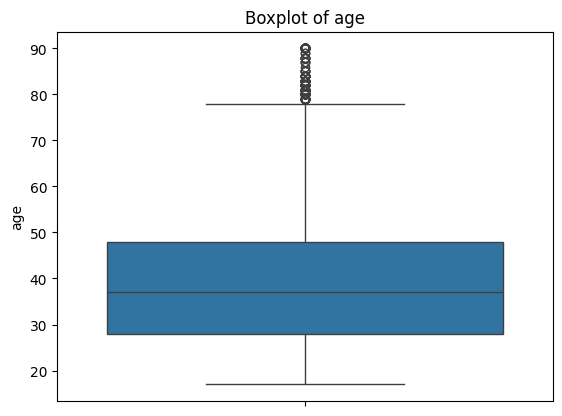

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['age'])
plt.title(f'Boxplot of {'age'}')
plt.show()


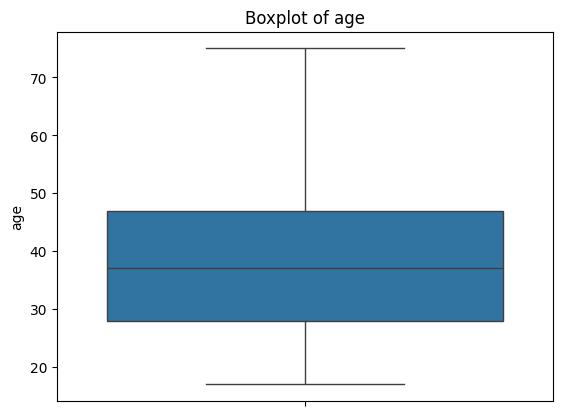

In [384]:
data = data[(data['age'] <= 75) & (data['age'] >= 15)]
sns.boxplot(data['age'])
plt.title(f'Boxplot of {'age'}')
plt.show()

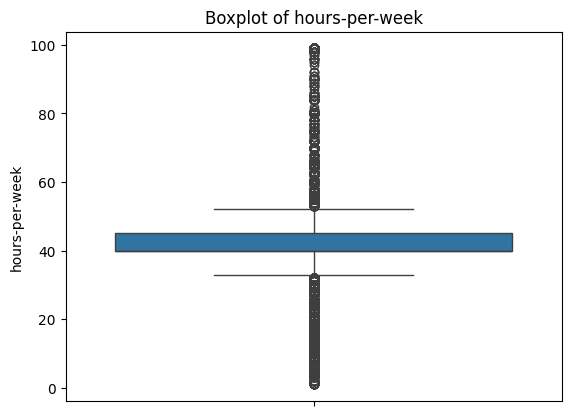

hours-per-week
40    22243
50     4201
45     2679
60     2160
35     1881
      ...  
79        1
94        1
87        1
69        1
82        1
Name: count, Length: 96, dtype: int64


In [385]:
sns.boxplot(data['hours-per-week'])
plt.title(f'Boxplot of {'hours-per-week'}')
plt.show()
print(data['hours-per-week'].value_counts())

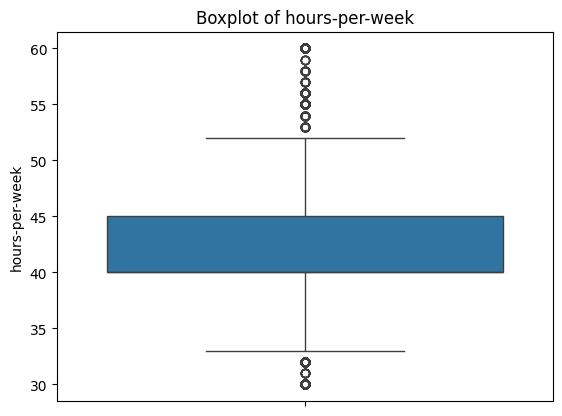

In [386]:
data = data[(data['hours-per-week'] >= 30) & (data['hours-per-week'] <= 60)]
sns.boxplot(data['hours-per-week'])
plt.title(f'Boxplot of {'hours-per-week'}')
plt.show()

In [387]:
data.shape

(40143, 15)

# Removing redundant features

In [388]:
data = data.drop(columns=['educational-num'])     #removing educational-num because education will be encoded
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Other,103497,Some-college,Never-married,other,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Removing unnecessary or less useful columns

In [389]:
data = data.drop(columns=['fnlwgt', 'race', 'relationship'])
data

,age,workclass,education,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,United-States,>50K
4,18,Other,Some-college,Never-married,other,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48836,22,Private,Some-college,Never-married,Protective-serv,Male,0,0,40,United-States,<=50K
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K


# Merging Capital-Gain and Capital-Loss

In [390]:
data['net-capital'] = data['capital-gain'] - data['capital-loss']
data.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)
data

,age,workclass,education,marital-status,occupation,gender,hours-per-week,native-country,income,net-capital
0,25,Private,11th,Never-married,Machine-op-inspct,Male,40,United-States,<=50K,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Male,50,United-States,<=50K,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,40,United-States,>50K,0
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Male,40,United-States,>50K,7688
4,18,Other,Some-college,Never-married,other,Female,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
48836,22,Private,Some-college,Never-married,Protective-serv,Male,40,United-States,<=50K,0
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,38,United-States,<=50K,0
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,40,United-States,>50K,0
48839,58,Private,HS-grad,Widowed,Adm-clerical,Female,40,United-States,<=50K,0


# Label encoding
convert each category into unique int value

In [391]:
from sklearn.preprocessing import LabelEncoder      #library for label encoding

#dictionary to store label encoders
label_encoders = {}

#list of categorical columns to encode
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'gender', 'native-country']

#applying label encoding and storing each encoder
for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
 
data

,age,workclass,education,marital-status,occupation,gender,hours-per-week,native-country,income,net-capital
0,25,3,1,4,6,1,40,38,<=50K,0
1,38,3,9,2,4,1,50,38,<=50K,0
2,28,1,5,2,10,1,40,38,>50K,0
3,44,3,12,2,6,1,40,38,>50K,7688
4,18,2,12,4,14,0,30,38,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
48836,22,3,12,4,10,1,40,38,<=50K,0
48837,27,3,5,2,12,0,38,38,<=50K,0
48838,40,3,9,2,6,1,40,38,>50K,0
48839,58,3,9,6,0,0,40,38,<=50K,0


# Spliting data into i/p & o/p

In [392]:
#splitting data into input & output
x = data.drop(columns=['income'])       #input or features
y = data['income']                      #output or target
x

,age,workclass,education,marital-status,occupation,gender,hours-per-week,native-country,net-capital
0,25,3,1,4,6,1,40,38,0
1,38,3,9,2,4,1,50,38,0
2,28,1,5,2,10,1,40,38,0
3,44,3,12,2,6,1,40,38,7688
4,18,2,12,4,14,0,30,38,0
...,...,...,...,...,...,...,...,...,...
48836,22,3,12,4,10,1,40,38,0
48837,27,3,5,2,12,0,38,38,0
48838,40,3,9,2,6,1,40,38,0
48839,58,3,9,6,0,0,40,38,0


# Feature scaling

In [393]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.13793103, 0.5       , 0.08333333, ..., 0.33333333, 0.92682927,
        0.04174213],
       [0.36206897, 0.5       , 0.75      , ..., 0.66666667, 0.92682927,
        0.04174213],
       [0.18965517, 0.16666667, 0.41666667, ..., 0.33333333, 0.92682927,
        0.04174213],
       ...,
       [0.39655172, 0.5       , 0.75      , ..., 0.33333333, 0.92682927,
        0.04174213],
       [0.70689655, 0.5       , 0.75      , ..., 0.33333333, 0.92682927,
        0.04174213],
       [0.60344828, 0.66666667, 0.75      , ..., 0.33333333, 0.92682927,
        0.18571223]])

# Train-Test splitting

In [394]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x, y,
                                           test_size=0.2,#20% of data is used for testing & 80% for training
                                           random_state=42, #using same value gives the same split every time
                                           stratify=y   #ensures same proportion of target class in training and test sets
                                           ) 

# Model training and comparison

Logistic Regression: 0.7729
Random Forest: 0.8367
Gradient Boosting: 0.8543
K-Nearest Neighbors: 0.8016
Support Vector Machine: 0.7995


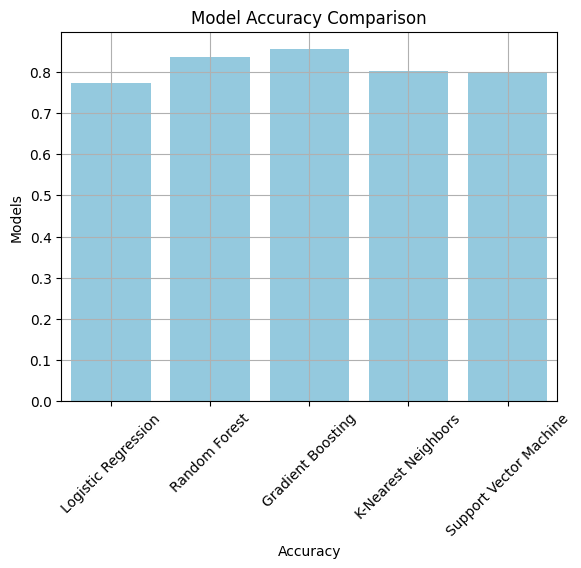

In [395]:
#importing ML models
from sklearn.linear_model import LogisticRegression                              
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score           #for checking model performance

#dictionary to hold models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# Dictionary to store accuracy
model_accuracies = {}

#training and testing each model
for name, model in models.items():
    model.fit(xtrain, ytrain)                   #train the model using training data
    ypred = model.predict(xtest)                #predict on test data
    acc = accuracy_score(ytest, ypred)          #calc acc
    model_accuracies[name] = acc                #store acc
    print(f"{name}: {acc:.4f}")        #print model name and acc

#bar plot showing accuracy comparison
sns.barplot(x=model_accuracies.keys(), y=model_accuracies.values(), color='skyblue')
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Model Accuracy Comparison")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Best model evaluation


Best Performing Model: Gradient Boosting with Accuracy = 0.8543


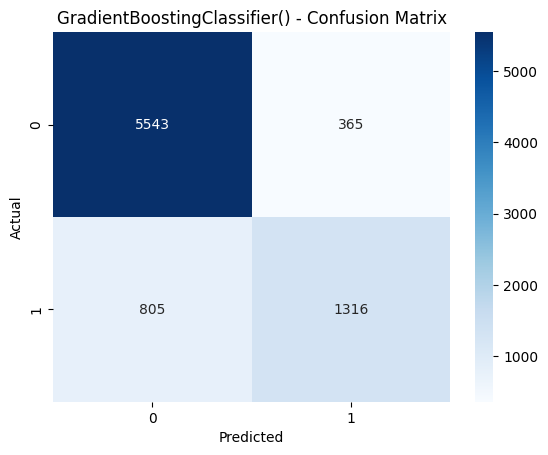

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      5908
        >50K       0.78      0.62      0.69      2121

    accuracy                           0.85      8029
   macro avg       0.83      0.78      0.80      8029
weighted avg       0.85      0.85      0.85      8029



In [396]:
#get best model
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Performing Model: {best_model} with Accuracy = {model_accuracies[best_model]:.4f}")\

#evaluating best model in more detail
from sklearn.metrics import classification_report  #gives precision, recall, f1-score, and support
from sklearn.metrics import confusion_matrix       #shows actual vs predicted values

best_model = models[best_model]
y_pred = best_model.predict(xtest)

# Confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{best_model} - Confusion Matrix")
plt.show()

# Classification report
print(classification_report(ytest, y_pred))

# Save the model

In [397]:
import joblib

# Save the best performing model
joblib.dump(best_model, "salary_prediction_model.pkl")

['salary_prediction_model.pkl']

In [398]:
#saving the encoders
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']